# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #импортирование библиотеки pandas
import matplotlib.pyplot as plt #импортируем библиотеку для построения диаграмм


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') #прочитала файл csv

In [3]:
display(data.head(20)) #выводим на экран первые 20 строк таблицы
data.info() # общая информация о таблице
data_duplic = data.duplicated().sum()
display('Число дубликатов в таблице:', data_duplic) #поиск количества явных дубликатов в фрейме

display(data.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

'Число дубликатов в таблице:'

0

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

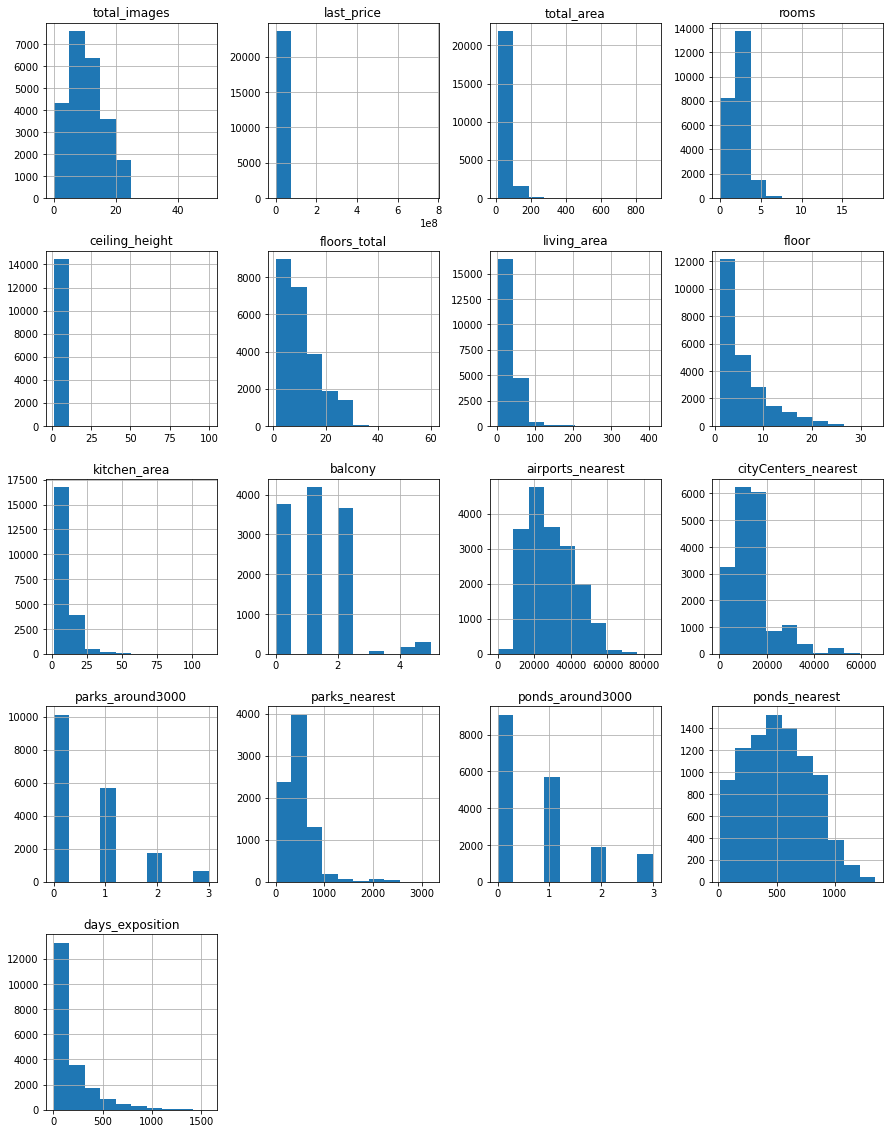

In [4]:
data.hist(figsize = (15,20))
data.info()



Вывод: В таблице 23698 строк. В некоторых столбцах есть пропущенные значения и некорректный тип данных


### Предобработка данных

In [5]:
display(data.isna().sum()) #поиск количества пропусков в столбцах фрейма

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
display(data['ceiling_height'].value_counts().tail(10)) # в столбце есть аномальные значения, поэтому пока что замену делать не стоит

 
data['is_apartment'] = data['is_apartment'].fillna(value = False) #заполним пропуски в столбце is_apartment значением False,полагая, что объекты, в которых пропуски - не апартаменты


kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean() #считаем какую долю в среднем кухни занииают от площади всего помещения 
#living_ratio = data['living_area'].mean() / data['total_area'].mean() # доля  жилой площади в общей

data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_ratio * data['total_area'])# заменяем пропуски в столбце произведением среднего значения по доле кухне к общей площади
#data['living_area'] = data['living_area'].fillna(living_ratio * data['total_area'])# аналогичная замена предудущей замене

data['balcony'] = data['balcony'].fillna(value=0).astype('int') # делаем замену пропуской в столбце на о, пологая, что в этих случаях балконы отсутвуют и сразу приводим знаяения в столбце к целому числу

#столбцы floors_total и locality_name имеет небольшое количество пропусков, поэтому возможно удалить строики с пропускамиБ существенного влияния на анализ данных это не окажет


data = data.dropna(subset = ['floors_total'])
data = data.dropna(subset = ['locality_name'])


#в столбцах parks_around300 и ponds_around300 также сделаем замену пропусков на значение 0. Вероятно пропуски образованы, так как парков и водоемов по близости нет
data['ponds_around3000'] = data['ponds_around3000'].fillna(value = 0).astype('int') # меняем значение в столбце на целочисленное
data['parks_around3000'] = data['parks_around3000'].fillna(value = 0).astype('int')


print(data.isnull().sum())

data.info()

14.00    1
2.25     1
3.88     1
24.00    1
8.30     1
4.25     1
3.39     1
3.93     1
10.30    1
4.65     1
Name: ceiling_height, dtype: int64

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_are

Вывод:
- в столбце is_apartment пропуски были заполнены по принципу - все пропущенные значения являются не аппартаментами.
- по столбцам kitchen_area и living_area сделаем заменну пропусков средними значениями из списка рассчитанными как доли от общей площади 
- пропуски в столбце balcony возможно возникли по прочине отсутвия балконов в квартирах, поэтому целесообразно заменить пропуски в этих значениях на 0
- в столбцах floors_total и locality_name незначительное количество пропусков, поэтому строки с пропусками можно удалить из фрейма, на качество анализа информации - это не повлияет.
- пропуски в столбцах parks_around и ponds_around заменим также на нули, скорее всего с данными объектами в заданной близости парков и прудов просто нет.

In [7]:

# приведем к целочисленному значения в столбцах

data['floors_total'] = data['floors_total'].astype('int')

data['last_price'] = data['last_price'].astype('int')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # приобразуем строку в дату
display(data.head()) #проверим таблицу с примененными изменениями

data.isnull().sum()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,27.848168,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Вывод: при выводе данные о таблице на экран было видно, что изменяемые столбцы имеют тип данных flot, таким параметракм, как количество балконов, количество парков, прудовых и.т.д. такой тип данных не подходит, правильный тип данных int - целое число.  Столбец first_data_exposition в таблице имел тип данных object, правильный тип данных, понятный для столбца в пандас
, содержащего даты - datetime.

In [8]:
#поиск неявных дубликатов в столбце locality_name
data['locality_name'].unique()
data['locality_name'] = data['locality_name'].str.lower() # присвоили нижний регистр всем значениям в столбце
#cоздаем функцию, которая заменит значения строк в столбце data['locacity_name'] на пустоту
def replace_locality_name(date, column, locality_name_list):
    for element in locality_name_list:
        data[column] = data[column].str.replace('locality_name', '')
#создадим списокБ который заменит пустоты в столбце  
locality_name_list = ['городской поселок', 'поселок городского типа', 'поселок при железнодорожной станции', 'коттеджный поселок', 'поселок станции', 'поселок','деревня','садоводческое некомерческое товарищество','садовое товарищество', 'село']
data['locality_name'] = data['locality_name'].str.replace('ё', 'e')
replace_locality_name(data, 'locality_name', locality_name_list)

print(data['locality_name'].unique())



['санкт-петербург' 'посeлок шушары' 'городской посeлок янино-1'
 'посeлок парголово' 'посeлок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'поселок городского типа красный бор' 'гатчина' 'поселок мурино'
 'деревня фeдоровское' 'выборг' 'кронштадт' 'кировск'
 'деревня новое девяткино' 'посeлок металлострой'
 'посeлок городского типа лебяжье' 'посeлок городского типа сиверский'
 'поселок молодцово' 'поселок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'посeлок аннино' 'поселок городского типа ефимовский'
 'посeлок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'посeлок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'посeлок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'поселок новый све

In [9]:
import numpy as np

#посмотрим какое количество каждой высоту в списке. В списке есть множество значений не соотвествующим реальной высоте потолков.Нужно их обработать.

display(data['ceiling_height'].value_counts())

display(data['ceiling_height'].describe()) #смотрим информацию по столбцу

display(data.query('ceiling_height > 20 and ceiling_height < 35')) #выведем срез из таблицы для высот от 20 до 35 метров, чтобы посмотреть что это за квартиры. Всего 21 строка. Данные нужно исправить?Скорее всего нужно запятую переставить на одно деление вперед.
index_list = data.query('ceiling_height > 20 and ceiling_height < 35').index #список индексов, содержащий срез значений от 20 до 35 м.Возможно была неверно расставлена запятая. Исправим

data.loc[index_list,'ceiling_height'] = data.loc[index_list, 'ceiling_height']/10


display(data['ceiling_height'].tail(20))#проверка получилось ли заменить 



data.info()




2.50     3515
2.60     1645
2.70     1571
3.00     1108
2.80      988
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,9.668043,2,гатчина,NaN,NaN,0,NaN,0,NaN,259.0
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,8.000000,0,волхов,NaN,NaN,0,NaN,0,NaN,NaN
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,False,...,7.000000,1,санкт-петербург,12016.0,13256.0,1,658.0,1,331.0,181.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,4.378643,2,посeлок мурино,NaN,NaN,0,NaN,0,NaN,28.0
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,5.500000,0,санкт-петербург,29686.0,8389.0,3,397.0,1,578.0,7.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,9.000000,2,деревня мины,NaN,NaN,0,NaN,0,NaN,540.0
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,False,...,7.000000,2,санкт-петербург,28981.0,10912.0,1,305.0,0,NaN,267.0
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,12.000000,5,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
6246,6,3300000,44.4,2019-03-25,2,25.0,5,31.3,5,False,...,5.700000,0,кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN
9379,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,False,...,5.200000,0,санкт-петербург,11647.0,13581.0,0,NaN,0,NaN,NaN


23679     NaN
23680    2.50
23681    2.50
23682    2.50
23683    2.50
23684    3.00
23685    2.50
23686    2.55
23687     NaN
23688    3.05
23689    2.86
23690     NaN
23691    2.75
23692     NaN
23693    2.60
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [10]:
#теперь посмотрим какие квартиры  имеют высоту потолков больше 35 . Всего 1 строка, удалим ее.

display(data.query('ceiling_height > 35'))
data = data.loc[data['ceiling_height'] != 100]

data.info()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,11.0,5,санкт-петербург,34963.0,8283.0,1,223.0,3,30.0,19.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  int64         
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        14480 non-null  float64       
 6   floors_total          23564 non-null  int64         
 7   living_area           21699 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  bool          
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          23564 non-null  float64       
 13  balcony         

In [11]:
display(data.query('ceiling_height >35 or ceiling_height <2 or 7 <ceiling_height <20')) # осталось 9 строк.Количество небольшое на дальнейшее исследование повлиять не должны повлиять на выборку.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000,30.0,2018-03-16,1,8.00,5,15.3,2,False,...,7.300000,0,деревня нурма,NaN,NaN,0,NaN,0,NaN,125.0
5712,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,5.200000,0,городской посeлок мга,NaN,NaN,0,NaN,0,NaN,248.0
5863,20,5650000,45.0,2018-08-15,1,8.30,16,19.3,14,False,...,8.300000,1,санкт-петербург,13069.0,10763.0,0,NaN,1,613.0,14.0
15061,19,5600000,56.4,2018-05-11,2,14.00,14,32.4,5,False,...,9.100000,2,санкт-петербург,14814.0,13610.0,0,NaN,0,NaN,315.0
15743,14,5600000,67.0,2016-11-11,3,8.00,16,41.0,1,False,...,8.000000,0,санкт-петербург,32691.0,11035.0,1,723.0,0,NaN,474.0
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.340000,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,71.0
17442,0,5350000,54.0,2015-06-16,2,8.00,5,29.0,2,False,...,9.457868,1,красное село,24638.0,28062.0,0,NaN,0,NaN,469.0
22309,20,5300000,45.0,2017-09-30,1,10.30,16,15.5,15,False,...,7.881557,0,санкт-петербург,36353.0,11936.0,2,440.0,2,450.0,136.0
22590,16,6000000,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,10.000000,0,санкт-петербург,33053.0,14217.0,2,293.0,2,289.0,13.0


In [12]:

display(data.query('ceiling_height <2'))
#удалим три строки, в которых значение потолков менее 2-х, слишком неправдоподобные значения
data = data.loc[data['ceiling_height'] != 1.20]
data = data.loc[data['ceiling_height'] != 1.75]
data = data.loc[data['ceiling_height'] != 1.00]

data.info()
display(data['ceiling_height'].isna().sum()) #осталось 9084 пропуска, их нужно заполнить 



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,5.20,0,городской посeлок мга,NaN,NaN,0,NaN,0,NaN,248.0
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.34,0,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,71.0
22590,16,6000000,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,10.00,0,санкт-петербург,33053.0,14217.0,2,293.0,2,289.0,13.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23561 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23561 non-null  int64         
 1   last_price            23561 non-null  int64         
 2   total_area            23561 non-null  float64       
 3   first_day_exposition  23561 non-null  datetime64[ns]
 4   rooms                 23561 non-null  int64         
 5   ceiling_height        14477 non-null  float64       
 6   floors_total          23561 non-null  int64         
 7   living_area           21696 non-null  float64       
 8   floor                 23561 non-null  int64         
 9   is_apartment          23561 non-null  bool          
 10  studio                23561 non-null  bool          
 11  open_plan             23561 non-null  bool          
 12  kitchen_area          23561 non-null  float64       
 13  balcony         

9084

In [13]:

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
display(data['ceiling_height'].isna().sum()) #заполним медианным значением столбец ceiling_category

data.info()# проверям все ли впорядке с количеством строк

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23561 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23561 non-null  int64         
 1   last_price            23561 non-null  int64         
 2   total_area            23561 non-null  float64       
 3   first_day_exposition  23561 non-null  datetime64[ns]
 4   rooms                 23561 non-null  int64         
 5   ceiling_height        23561 non-null  float64       
 6   floors_total          23561 non-null  int64         
 7   living_area           21696 non-null  float64       
 8   floor                 23561 non-null  int64         
 9   is_apartment          23561 non-null  bool          
 10  studio                23561 non-null  bool          
 11  open_plan             23561 non-null  bool          
 12  kitchen_area          23561 non-null  float64       
 13  balcony         

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23561 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23561 non-null  int64         
 1   last_price            23561 non-null  int64         
 2   total_area            23561 non-null  float64       
 3   first_day_exposition  23561 non-null  datetime64[ns]
 4   rooms                 23561 non-null  int64         
 5   ceiling_height        23561 non-null  float64       
 6   floors_total          23561 non-null  int64         
 7   living_area           21696 non-null  float64       
 8   floor                 23561 non-null  int64         
 9   is_apartment          23561 non-null  bool          
 10  studio                23561 non-null  bool          
 11  open_plan             23561 non-null  bool          
 12  kitchen_area          23561 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [15]:
#добавим новые столбцы в фрейм

data['price_per_metr'] = data['last_price']/data['total_area'] 
data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

#используем функцию для категоризации этажей, категории отнесем в новым столбец floor_catrgory

def category_row(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor ==1:
        return 'первый'
    if 1 < floor < floors_total:
        return 'другой'
    if floor == floors_total:
        return 'последний'

data['floor_category'] = data.apply(category_row,axis =1)
#переводим метры в километры
data['distance_to_center'] = data['cityCenters_nearest']/ 1000
data['distance_to_center'] = data['distance_to_center'].round() #округление до целых 


display(data) # проверим изменения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_exposition,month_exposition,year_exposition,floor_category,distance_to_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,796.0,3,381.0,NaN,72490.845228,1,3,2017,другой,4.0
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,0,NaN,45.0,52542.372881,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,0,NaN,NaN,44091.710758,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,173.0,3,196.0,602.0,149511.400651,1,3,2017,другой,10.0


### Проведите исследовательский анализ данных

count    23561.000000
mean        60.326156
std         35.658898
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

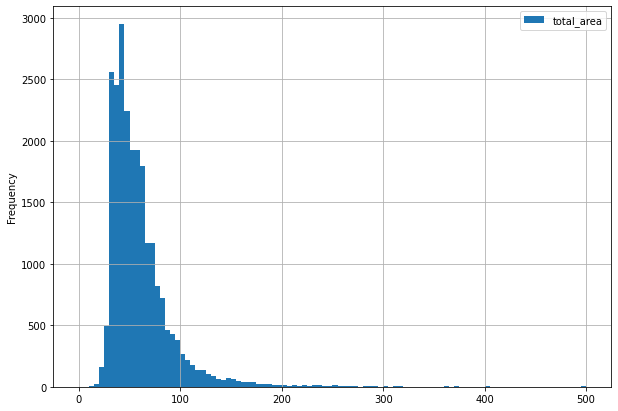

In [16]:
data.plot(y = 'total_area', kind ='hist', bins = 100, grid = True, range = (0,500), figsize=(10,7))# гисторграмма параметра total_area
data['total_area'].describe()

вывод: гистограмма по данному столбцу имеет нормальное распределение. Наибольший спрос имеют квартиры до 80 кв. метров,при этом,в среднем площадь квартир составляет около 60 кв. метров. Чаще всего встречаются квартиры чуть больше 30 метров и 45 метров. Похоже это 1 и 2 комнатные квартиры. Квартиры площадью больше 150 кв. метров являются большой редкостью

0

count    23561.000000
mean        34.337462
std         21.712360
min         10.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_exposition,month_exposition,year_exposition,floor_category,distance_to_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
16,11,6700000,82.00,2017-11-23,3,3.05,5,55.6,1,False,...,420.0,0,NaN,397.0,81707.317073,3,11,2017,первый,11.0
19,16,14200000,121.00,2019-01-09,3,2.75,16,76.0,8,False,...,NaN,0,NaN,97.0,117355.371901,2,1,2019,другой,13.0
29,9,8600000,100.00,2016-04-09,3,2.65,19,52.0,15,False,...,532.0,1,896.0,125.0,86000.000000,5,4,2016,другой,12.0
33,8,4800000,73.00,2018-10-15,4,2.65,9,51.6,5,False,...,NaN,0,NaN,92.0,65753.424658,0,10,2018,другой,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23667,14,9990000,90.00,2017-01-23,3,3.06,17,55.0,9,False,...,NaN,1,545.0,86.0,111000.000000,0,1,2017,другой,33.0
23680,14,5000000,59.00,2019-04-04,3,2.50,5,52.0,1,False,...,NaN,0,NaN,NaN,84745.762712,3,4,2019,первый,12.0
23684,20,21400000,145.00,2018-11-02,4,3.00,26,71.4,17,False,...,NaN,0,NaN,NaN,147586.206897,4,11,2018,другой,11.0
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.0,12,False,...,NaN,0,NaN,23.0,91089.108911,0,4,2019,другой,14.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23561 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23561 non-null  int64         
 1   last_price            23561 non-null  int64         
 2   total_area            23561 non-null  float64       
 3   first_day_exposition  23561 non-null  datetime64[ns]
 4   rooms                 23561 non-null  int64         
 5   ceiling_height        23561 non-null  float64       
 6   floors_total          23561 non-null  int64         
 7   living_area           23561 non-null  float64       
 8   floor                 23561 non-null  int64         
 9   is_apartment          23561 non-null  bool          
 10  studio                23561 non-null  bool          
 11  open_plan             23561 non-null  bool          
 12  kitchen_area          23561 non-null  float64       
 13  balcony         

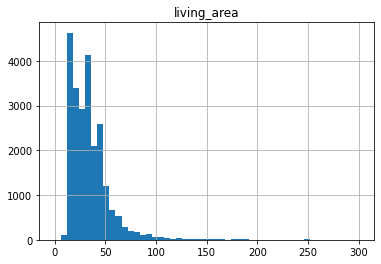

In [18]:

data['living_area'].describe() # в перечне есть слишком маленькие значения жилых помещений, к примеру мин. значение 2 метра, что явл. некорректным.

#display(new_list.head(20))
#действительно, в перечне есть квартиры в которых площади жилых помещений слишком малы - это ошибка, скорее всего ошиблись на 10 кв. метров, прибавим их к каждой жидлй площади, менее 10 кв. метров

data.loc[data['living_area']< 10, 'living_area'] += 10
#display(new_list.head(20)) #замена прошла успешно

#living_ratio = data['living_area'].mean() / data['total_area'].mean() # доля  жилой площади в общей
#data['living_area'] = data['living_area'].fillna(living_ratio * data['total_area'])


# пропуски в столбце "living_area" заменим на медианы значений жилой площади по каждому значению кол-ва комнат столбца "rooms". 

median_replace_rooms = data.groupby('rooms')['living_area'].median()
for total in data['rooms'].unique():
    data.loc[(data['rooms'] == total) & (data['living_area'].isna()), 'living_area'] = median_replace_rooms[total]
    
    
    
#проверяем, чтобы все пропуски были заполнены
display(data['living_area'].isna().sum())


# гисторграмма параметра living_area
data.hist('living_area', bins=50, range=(0,300));
display(data['living_area'].describe())
display(data.query('living_area >50'))
data.info()



Вывод: Из гистограммы видно, что в среднем площадь жилой зоны составляет -34.3 кв. м., при этом основной пул площадей попадает в промежуток от 18 до 42 кв. м., такие параметры жилой площади характерны для 1 и 2 комнатных квартир.Объектов с жилой площадью более 50 кв. всего 3051, соответсвенно квартиры с большим количеством комнат менее популярны.

count    23561.000000
mean        10.500594
std          6.038437
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

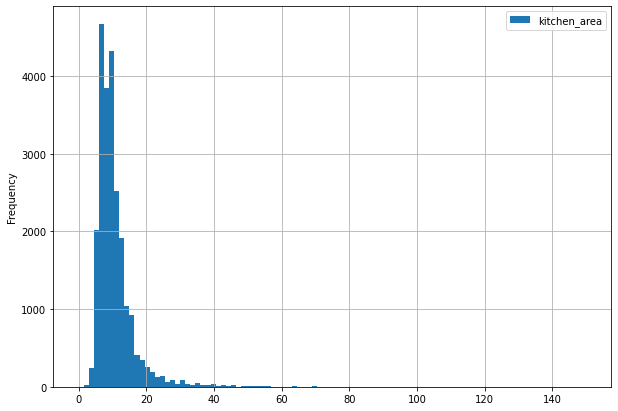

In [19]:
data.plot(y = 'kitchen_area', kind ='hist', bins = 100, grid = True, range = (0,150), figsize=(10,7))# гисторграмма параметра kitchen_area
data['kitchen_area'].describe()

вывод: распределение является нормальным, поэтому среднее можно использовать в качестве надежной оценки. В среднем, размер кухни составляет 10.5 кв., наиболее часто встречаются квартиры с кухнями около 10 кв. метров, кухни более 20 кв. метров в квартирах встречаются редко, разброс относительно среднего небольшой, то есть подавляюющее большинство кухонь находится в диапозоне 10.5+ 6.2 кв. м.

count    23561.00000
mean         6.54004
std         10.91166
min          0.01219
25%          3.40000
50%          4.64600
75%          6.79000
max        763.00000
Name: last_price, dtype: float64

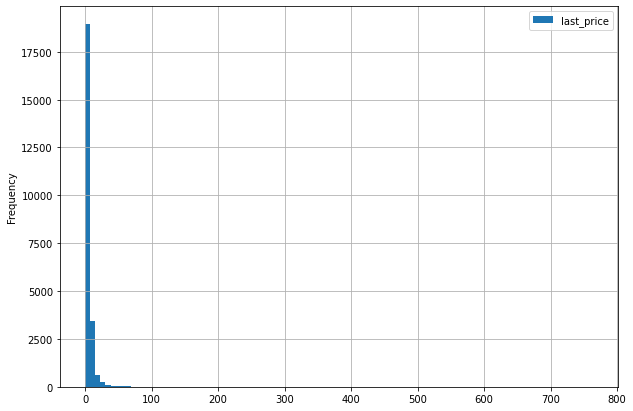

In [20]:

data['last_price']=data['last_price']/ 1000000 #делим на 1000, чтобы данные описывающие гистограмму были читабельными
data.plot(y = 'last_price', kind ='hist', bins = 100, grid = True, figsize=(10,7))# гисторграмма параметра last_price
data['last_price'].describe()



Вывод:Распределение считается нормальным.По гистограмме видно, большинтсов квартир имеют стоимость до 15 млн. рублей.В среднем стоимость из данного набора сосатвляет 6.5 млн. руб. Максимальная стоимость квартиры в выобрке 763 млн. руб.


count    23561.000000
mean         2.070753
std          1.078637
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

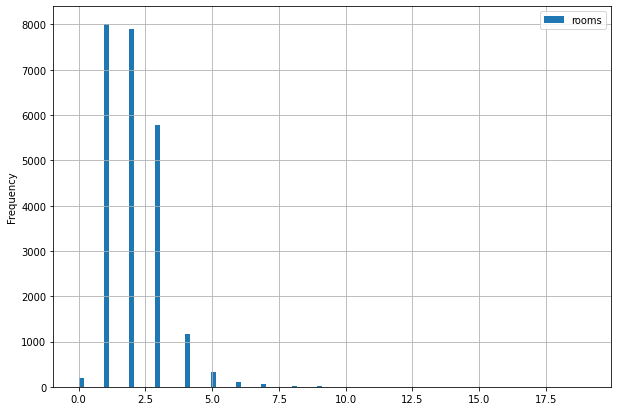

In [21]:
data.plot(y = 'rooms', kind ='hist', bins = 100, grid = True, figsize=(10,7))# гисторграмма параметра rooms
data['rooms'].describe()

Вывод: из данных гистограммы видно, что самыми популярными среди объектов недвижимости являются квартиры с двумя и одной комнатой, следом идут трехкомнатные квартиры. в среднем квартиры в выборке имеют две комнаты.

count    23561.000000
mean         2.699377
std          0.272955
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

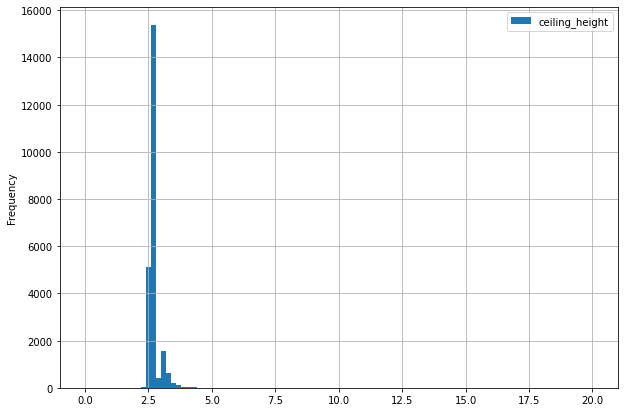

In [22]:
data.plot(y = 'ceiling_height', kind ='hist', bins = 100, grid = True,range = (0,20), figsize=(10,7))# гисторграмма параметра ceiling_height
data['ceiling_height'].describe()

Вывод: из гистограммы видно, что самый распространенная высота потолков - 2.5-2.7 м. Межквартальный размах : 2.6-2.7, получается в этот промежуток (по высоте потолков) попадает основной пул квартир. В среднем высота потолков - 2.69 м. Максимальное значение в 100 м. не влияет на выборку сущесивенно,так как это единственное значение в выборке, остальные аномальные данные были устранены.

count    23561.000000
mean         5.878358
std          4.871783
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

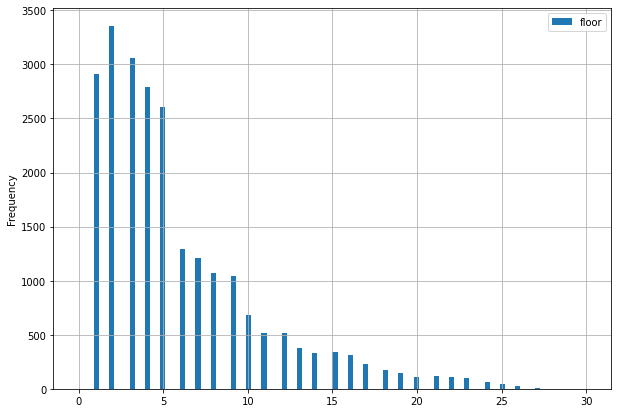

In [23]:

data.plot(y = 'floor', kind ='hist', bins = 100, grid = True, figsize=(10,7), range = (0,30)) #гисторграмма параметра floor
data['floor'].describe()

Вывод: Самым распространенным этажом является второй. Чуть менее распространенные этажи - третий, четвертый и первый. Квартиры на высоких этажах являются не популярными. 

In [24]:
print(data['floor_category'].value_counts()) #считаем количество этажей в каждой категории


        


другой       17324
последний     3329
первый        2908
Name: floor_category, dtype: int64


Вывод: данные не очень информативные. По данным видно, что количество последних этажей больше,чем первых. Доля последних и первых сумма составляет примерно 37%.

count    23561.000000
mean        10.675311
std          6.592801
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

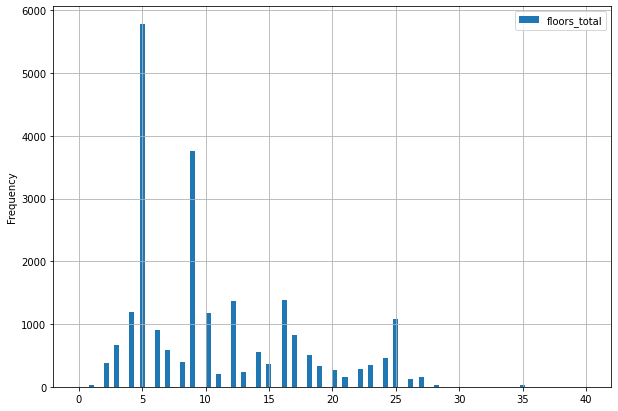

In [25]:
data.plot(y = 'floors_total', kind ='hist', bins = 100, grid = True, figsize=(10,7), range = (0,40)) #гисторграмма параметра floors_total
data['floors_total'].describe()

Вывод: Гистограмма показывает, что в выборке чаще всего встречаются пятиэтажные дома. Дома в 9 этажей всьречаются также довольно часто. 

count    18061.000000
mean     14192.635790
std       8613.825667
min        181.000000
25%       9238.000000
50%      13095.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

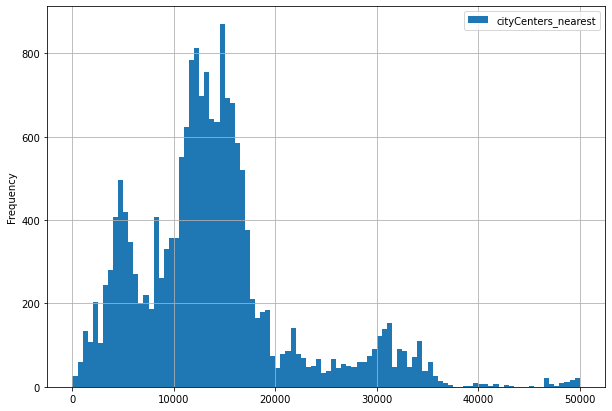

In [26]:
data.plot(y = 'cityCenters_nearest', kind ='hist', bins = 100, grid = True, figsize=(10,7), range = (0,50000)) #гисторграмма параметра cityCenters_nearest
data['cityCenters_nearest'].describe()



Вывод:по гистрограмме видно, что популярнее всего квартиры, находящиеся в близости от 9 000 до 17 000 метров, то есть 10-17 км до центра. Квартиры, находящиеся в близости более 60 км. практически отсутствуют. На графике также заметно, что есть самые популярные квартиры в самом центре - это в близости примерно 5 км и квартиры, которы находятся недалеко от центре, их большинство. В среднем, расстояние до центра города составляет около 14 км.

count    18038.000000
mean     28797.062923
std      12633.204783
min          0.000000
25%      18559.000000
50%      26756.500000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

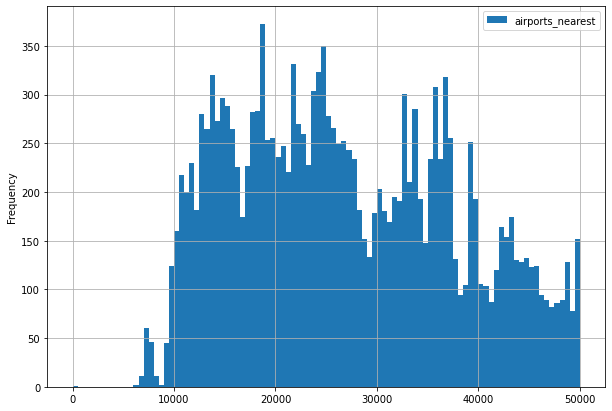

In [27]:
data.plot(y = 'airports_nearest', kind ='hist', bins = 100, grid = True, figsize=(10,7), range = (0,50000)) #гисторграмма параметра cityCenters_nearest
data['airports_nearest'].describe()


Вывод:самые часто встречающие квартиры находятся на расстоянии примерно 18 км. от аэропорта. Основная часть квартир попадает в диапазон 18.5 - 37 км. - квартальный размах. В среднем, квартиры находятся на расстоянии практически 29 км от аэропорта.

count    8028.000000
mean      490.638391
std       341.595327
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

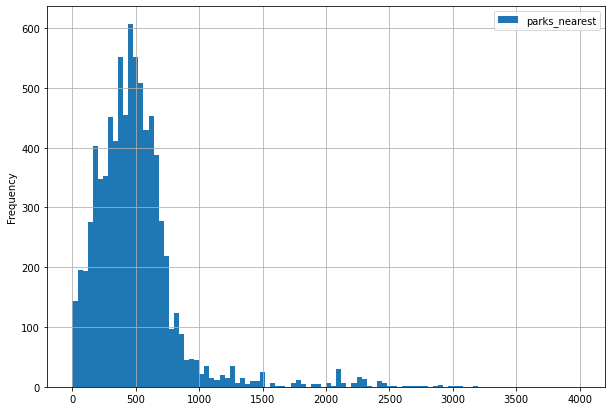

In [28]:
data.plot(y = 'parks_nearest', kind ='hist', bins = 100, grid = True, figsize=(10,7), range = (0,4000)) #гисторграмма параметра cityCenters_nearest
data['parks_nearest'].describe()

Вывод: все квартиры в близости 3.2 км имеют парки.Большинство квартир в объявлениях имеют парки на расстоянии около 500 метров. В среднем ближайший парк находится на расстоянии 490 метров. Максимальное расстояние до парка равно 3190 метров.

<AxesSubplot:ylabel='Frequency'>

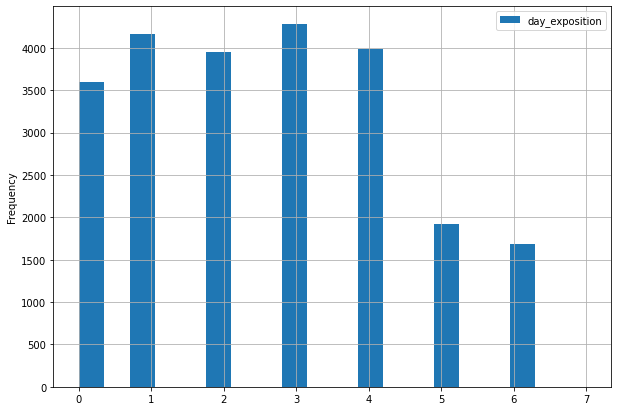

In [29]:
data.plot(y = 'day_exposition', kind ='hist', bins = 20, grid = True, figsize=(10,7), range = (0,7)) #гисторграмма параметра cityCenters_nearest


Вывод: по гистограмме видно, что чаще всего публикуются объяления в понедельник - вторник (начало недели) и четверг, реже всего в выходные дни. Возможно это связано с началом трудовой деятельности и меньшими просмотрами объявлений в выходные

<AxesSubplot:ylabel='Frequency'>

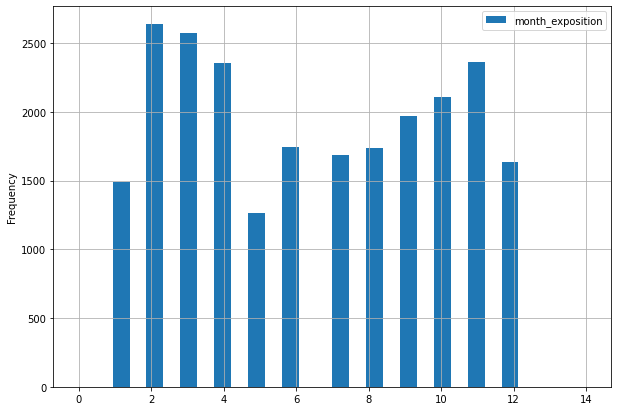

In [30]:
data.plot(y = 'month_exposition', kind ='hist', bins = 30, grid = True, figsize=(10,7), range = (0,14)) #гисторграмма параметра cityCenters_nearest


Вывод: чаще всего объявления публикуются в зимний период времени - начало года с февраля по апрель.Реже всего объявления публикуются в летний период времени. Видна четкая сезонность публикации. Пик публикаций, приходящий на начало года связан именном с началом года, а так же с сезоном, отсутвия большого количества отпусков и соответсвенно, в зимний период возможное количество просмотров больше, чем в летнее время.

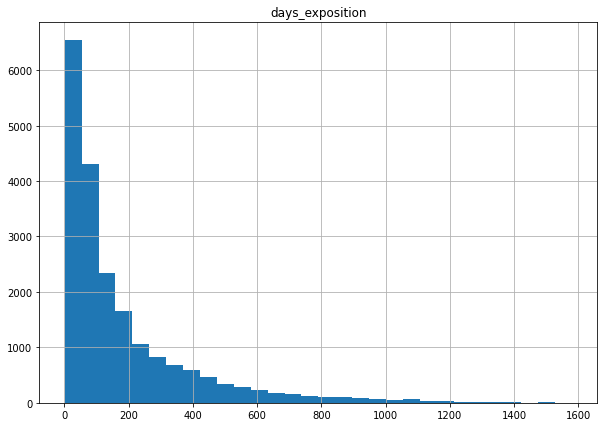

count    20390.000000
mean       180.759637
std        219.746426
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана = 95.0


In [31]:

data.hist('days_exposition', bins = 30, grid = True, figsize=(10,7))#гисторграмма параметра days_exposition
plt.show()
display(data['days_exposition'].describe())

print('Медиана =', data['days_exposition'].median())



Данное распределение явялется Паусонным. В среднем квартиры продаются через 180 дней после публикации объявления.Однако разброс относительно среднего большой - 219 дней. Быстрыми можно считать продажи, которые попадают в первый квартиль от 1 до 45 дней, нормальными по сроку можно считать продажи, которые попадают в квартальный размах - это от 45 до 231 дней. и Долгие- это продажи, которые выходят за значение 1.5 межквартального размаха, т.е. за 550 дней

0.6536724385118196

<AxesSubplot:xlabel='total_area'>

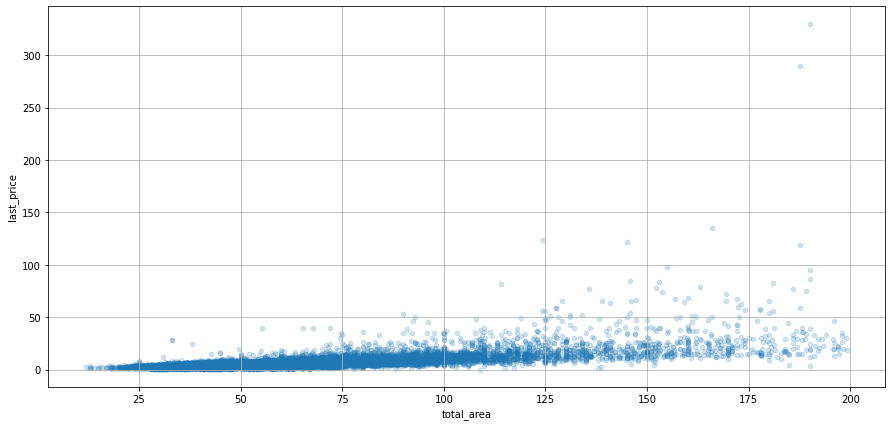

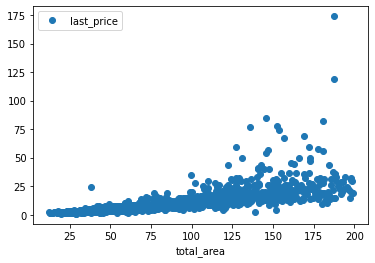

In [32]:
#посчитаем коэффициенты корреляции между параметром last_price и другими переменными, для понимания насколько связь сильная.
display(data['last_price'].corr(data['total_area']))

# находим срез для квартир площадьб от 20 до 100 кв.м., строим из полученных данных сводную таблицу и график зависимости

#data.pivot_table(index = 'total_area', values = 'last_price').plot(x = 'total_area', y = 'last_price', grid = True, figsize = (12, 5),kind = 'scatter')



   
data.query('total_area <200').plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(15,7), alpha=0.2)

data.query('total_area <200').pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o')

Вывод: по диаграмме рассеивания видно, что зависимость между стоимость жилья и общей площадью есть (положительная корреляция).Чем больше квадратура, тем больше цена, однако, с увеличением площади квартиры, связь между параметрами становится меньше, это хорошо заметно для значений площади более 100 кв. метров

0.556405036065619

<AxesSubplot:xlabel='total_area'>

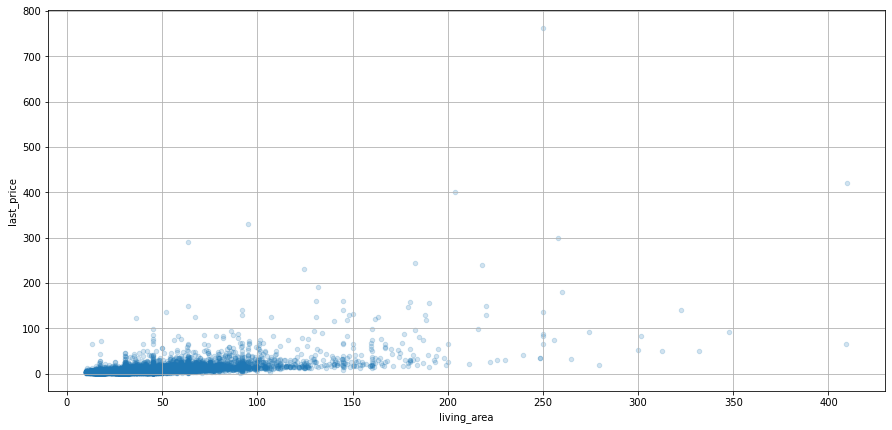

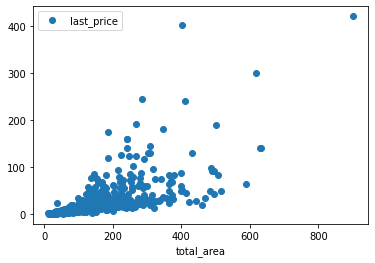

In [33]:
display(data['last_price'].corr(data['living_area']))
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(15,7), alpha=0.2)
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o')

Вывод: между парметрами есть зависимость, но не сильная, слабее, чем у общей площади квартиры (положительная корреляция).При увеличении жилой площади, цена квартиры растет. Однако данная зависимость слабеет с увеличением жилой площади, так как же и в пред. исследовании относительно общей площади квартиры.

0.5145438786080619

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

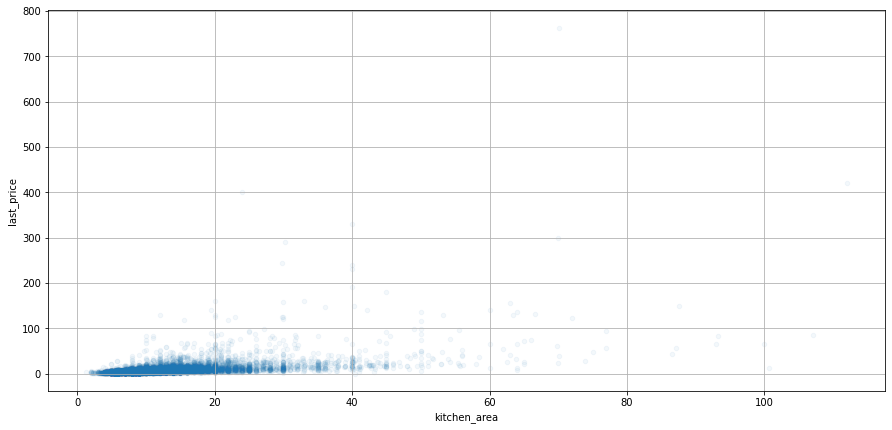

In [34]:
display(data['last_price'].corr(data['kitchen_area']))
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(15,7), alpha=0.05)

Вывод: зависимость между размером кухни и ценой на квартиру есть, но еще более слабая, чем в двух пред. исследованиях. Корреляция положительная.

In [ ]:
display(data['last_price'].corr(data['rooms']))

data.plot(x='rooms', y='last_price', kind='bar', grid=True, figsize=(8,5))



0.36323430781266447

<AxesSubplot:xlabel='rooms'>

Вывод: прослеживается очень 
слабая зависимость, цена увеличивается с увеличением количества комнат до 4, в дальнейшем, цена снижается.

In [ ]:
#чтобы понять зависимость между ценой на квартиру и ее распоожением, рассчитаем среднее значение стоимости квартир в каждой категории этажей, что поможет сравнить данные
avr_floor_category_price = data.groupby('floor_category')['last_price'].mean()
print(avr_floor_category_price)

avr_floor_category_price.plot(x=avr_floor_category_price.index, y='last_price', kind='bar', grid=True, figsize=(8,5))

Вывод: из столбчатой биаграммы видно, что в среднем цена на квартиры на первом этаже ниже, чем цена на квартиры на последним и других этажах. Из этих данных можно сказать, что зависимость есть.

In [ ]:
display(data['last_price'].corr(data['day_exposition']))
data.plot(x='day_exposition', y='last_price', kind='bar', grid=True, figsize=(15,7))


Вывыд: зависимость между ценой продажи и датой публикации не прослеживается, об этом говорит и отрицательный коэффициент корреляции = -0.016.

In [ ]:
display(data['last_price'].corr(data['month_exposition']))
data.plot(x='month_exposition', y='last_price', kind='bar', grid=True, figsize=(15,7))

Вывод: зависимость между параметрами отсутвует, об этом свидетельствует коэффециент корреляции близкий к значению 0, по диаграмме рассеивания все точки расположены хаотично.

In [ ]:
display(data['last_price'].corr(data['year_exposition']))
data.plot(x='year_exposition', y='last_price', kind='bar', grid=True, figsize=(15,7))

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В трех ячейках выше аналогичные комментарии по графикам.

Вывод: зависимость между годом публикации и стоимость квартиры отсутвует.

In [ ]:
locality_sort = data['locality_name'].value_counts().sort_values(ascending=False).head(10) # запишем в переменную 10 локаций с наибольшим количество объявлений

#на онове среза сделаем сводную таблицу медианных значений зависимости цены от локации, отсортируем ее по возрастанию , чтобы определить самуюнизкую и самую высокую стоимость кв. м. и построим график на основе данных.

data.query('locality_name in @locality_sort.index').pivot_table(index ='locality_name', values = 'last_price', aggfunc ='median').sort_values('last_price').plot(kind = 'bar')

Вывод: из перречня 10 самых публикуемых локаций получилось, что стоимость недвижимости выше всего в Санкт_Петербурге, а самая низкая стоимость за кв. м. в Гатчине.

In [ ]:
print(data['distance_to_center'].isna().sum())

data['price_per_km'] = data['last_price']/data['distance_to_center']
#print(data['price_per_km'])

piter = data.loc[data['locality_name']=='cанкт-петербург',['last_price', 'cityCenters_nearest']].reset_index(drop = True)
display(data['locality_name'])


data.query('locality_name == "санкт-петербург"').pivot_table(index = 'distance_to_center', values = 'price_per_km', aggfunc = 'mean').sort_values(by ='distance_to_center').plot(kind = 'bar', figsize = (10,5))

display(data['distance_to_center'].corr(data['price_per_metr']))
data.query('locality_name == "санкт-петербург"').pivot_table(index = 'distance_to_center', values = 'last_price').reset_index().plot(x = 'distance_to_center', y = 'last_price',kind = 'scatter', grid = True)

Вывод: по графику видно, что в пределах одного километра стоимость недвижимости достигает максимального значения - более 20 млн. руб., однако стоимость сильно снижается, если расстояние до центра города выходит за пределы 1 км. Получается, что, все объекты, которые находятся в радиусе 1 км от центра города можно называть центром города. По диаграмме рассеиввания видно (учитываются два параметра расстояние до центра и стоимость квартиры вцелом) также видно, что есть второй подем стоимости квартир в области 7-8 км до центра. Таким образом, можно сказать, что стоимость жилья в самом уентре города и на расстоянии 7-8 км, что считается близким к центру, является намного выше, чем на расстоянии более 8 км.

### Общий вывод

Общий вывод:
- самыми популяпрными для продажи являются квартиры площадью до 100 кв. метров -это 1 и 2 комнатные квартиры, расположенные на 2-4 этажах, при чем самым привлекательным является 2 этаж. Большинство квартир расположено в 5 и 9 этажных домах.В объявлениях представлены в основном квартиры, находящиеся 10-17 км от центра города и практически нет невижимости на расстоянии 60 км от центра.
- стоимость квартир зависит от площади, но такая связь в основм характера для квартир с площадью до 80 кв.метров(1-2 комнатные квартиры), далее зависимость слабеет. Есть зависимость цены квартир от этажности. Квартиры, расположенные на первом этаже дешевле. Зависимости цены от дня, месяца и года публикации не выявлено.Также есть зависимость между площадью кухни  и стоимостью квартиры , но не сильная, это ожидаемо, так как вцелом есть зависимость между площадью квартиры и ее ценой.
- рассматриваю локацию недвижимости, можно отметить, что среди самых догогих квартир в перечене являются квартиры. Таким образом, из параметров, которые были отобраны для исследования,было выявлено, что больше всего на стоимость квартиры влияют:
- площадь квартиры;
- удаленность от центра города
- этаж

- расположенные в Санкт-Петербурге, самые дешевые из списка 10 самых часто встречаемых обявлений по локациям, является недвижимость в Гатчине. Удаленность от центра также сильно влияет на стоимость недвижимости. Самые дорогие квартиры, расположены в центре города. Есть еще одна граница, она находится в районе 7-8 км от самого центра, после которой следует сильное падение цены  и после начинает убывать постепенно. Это и есть центральная зона (в радиусе 7-8 км от центра). 